<a href="https://colab.research.google.com/github/tkhan221/Data110-Fall2025/blob/main/TeedaKhan_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import files
uploaded = files.upload()


Saving co2_global_emissions_lab_clean.csv to co2_global_emissions_lab_clean (2).csv


In [47]:
import pandas as pd
df = pd.read_csv('co2_global_emissions_lab_clean (1).csv')
df.head()

,Country Name,Country Code,year,co2
0,Aruba,ABW,2000.0,26.194875
1,Aruba,ABW,2001.0,25.934024
2,Aruba,ABW,2002.0,25.671162
3,Aruba,ABW,2003.0,26.420452
4,Aruba,ABW,2004.0,26.517293


In [48]:
df.info()
df.describe()
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  3732 non-null   object 
 1   Country Code  3732 non-null   object 
 2   year          3720 non-null   float64
 3   co2           3720 non-null   float64
dtypes: float64(2), object(2)
memory usage: 116.8+ KB


Index(['Country Name', 'Country Code', 'year', 'co2'], dtype='object')

In [49]:
df.isnull().sum()


,0
Country Name,0
Country Code,0
year,12
co2,12


In [50]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().head())




Value counts for Country Name:
Country Name
Zimbabwe       15
Aruba          15
Afghanistan    15
Angola         15
Albania        15
Name: count, dtype: int64

Value counts for Country Code:
Country Code
ZWE    15
ABW    15
AFG    15
AGO    15
ALB    15
Name: count, dtype: int64


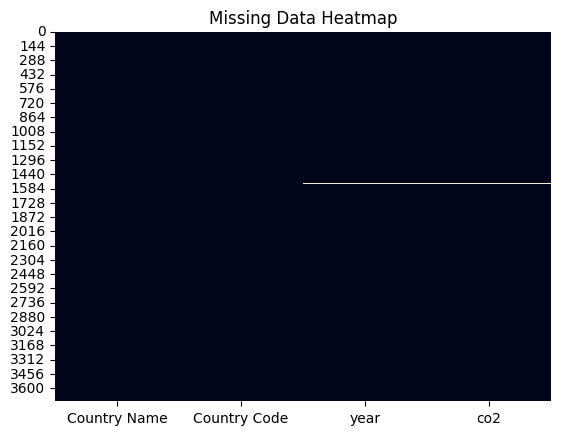

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()




In [35]:
df.isnull().sum()


,0
Country Name,0
Country Code,0
year,12
co2,12


In [36]:
df[df['co2'].isnull()]


,Country Name,Country Code,year,co2
135,American Samoa,ASM,NaN,NaN
526,Channel Islands,CHI,NaN,NaN
1322,Guam,GUM,NaN,NaN
1533,Isle of Man,IMN,NaN,NaN
1549,Not classified,INX,NaN,NaN
2083,St. Martin (French part),MAF,NaN,NaN
2099,Monaco,MCO,NaN,NaN
2305,Northern Mariana Islands,MNP,NaN,NaN
2711,Puerto Rico,PRI,NaN,NaN
2996,San Marino,SMR,NaN,NaN


In [37]:
df['co2'].isnull().sum()


np.int64(12)

In [38]:
df['co2'] = df['co2'].fillna(df['co2'].mean())

In [39]:
df['co2'].isnull().sum()

np.int64(0)

In [40]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  3732 non-null   object 
 1   Country Code  3732 non-null   object 
 2   year          3720 non-null   float64
 3   co2           3732 non-null   float64
dtypes: float64(2), object(2)
memory usage: 116.8+ KB


,0
Country Name,0
Country Code,0
year,12
co2,0


In [41]:
df[df['year'].isnull()]


,Country Name,Country Code,year,co2
135,American Samoa,ASM,NaN,4.797763
526,Channel Islands,CHI,NaN,4.797763
1322,Guam,GUM,NaN,4.797763
1533,Isle of Man,IMN,NaN,4.797763
1549,Not classified,INX,NaN,4.797763
2083,St. Martin (French part),MAF,NaN,4.797763
2099,Monaco,MCO,NaN,4.797763
2305,Northern Mariana Islands,MNP,NaN,4.797763
2711,Puerto Rico,PRI,NaN,4.797763
2996,San Marino,SMR,NaN,4.797763


In [42]:
df = df.dropna(subset=['year'])

In [43]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3720 entries, 0 to 3731
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  3720 non-null   object 
 1   Country Code  3720 non-null   object 
 2   year          3720 non-null   float64
 3   co2           3720 non-null   float64
dtypes: float64(2), object(2)
memory usage: 145.3+ KB


,0
Country Name,0
Country Code,0
year,0
co2,0


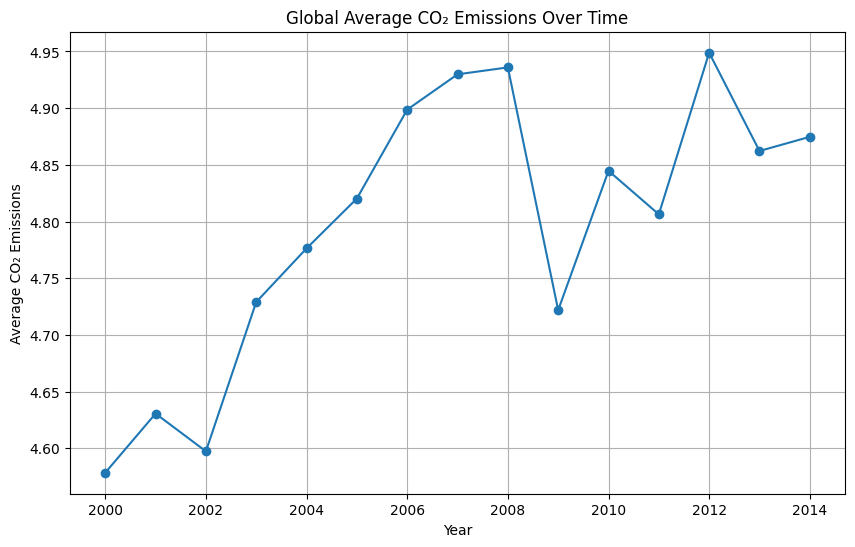

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average CO₂ by year
global_trend = df.groupby('year')['co2'].mean()

plt.figure(figsize=(10,6))
plt.plot(global_trend.index, global_trend.values, marker='o')
plt.title('Global Average CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Average CO₂ Emissions')
plt.grid(True)
plt.show()


/tmp/ipython-input-1085835181.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='autumn')


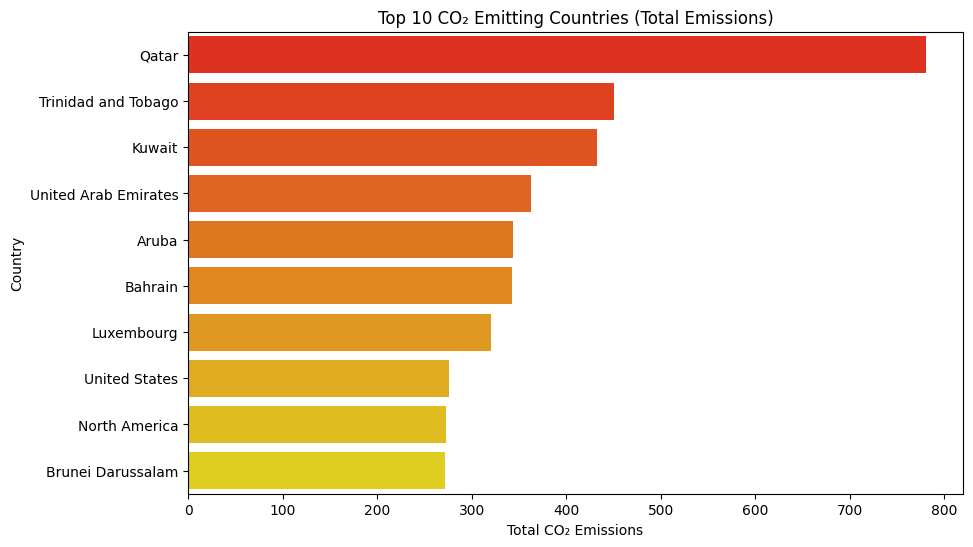

In [52]:
top10 = df.groupby('Country Name')['co2'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette='autumn')
plt.title('Top 10 CO₂ Emitting Countries (Total Emissions)')
plt.xlabel('Total CO₂ Emissions')
plt.ylabel('Country')
plt.show()


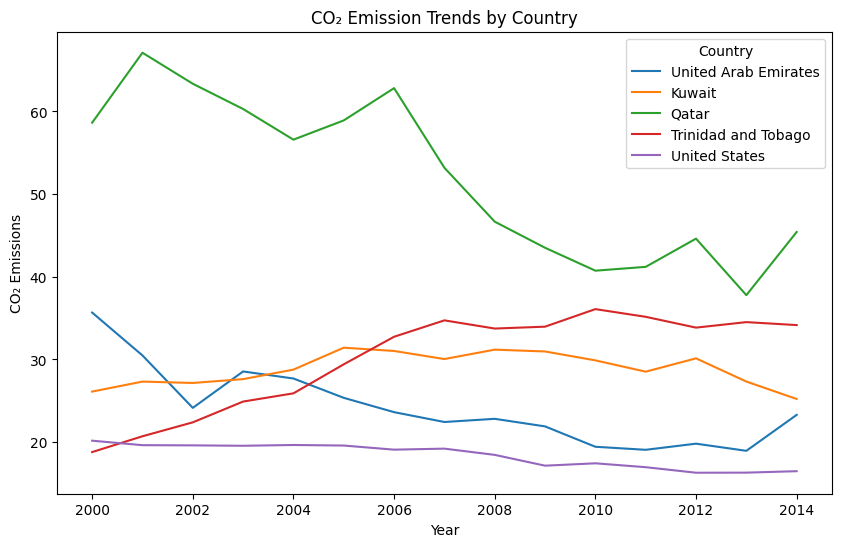

In [68]:
countries = ['United States', 'Qatar', 'Trinidad and Tobago', 'Kuwait', 'United Arab Emirates']
subset = df[df['Country Name'].isin(countries)]

plt.figure(figsize=(10,6))
sns.lineplot(data=subset, x='year', y='co2', hue='Country Name')
plt.title('CO₂ Emission Trends by Country')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions')
plt.legend(title='Country')
plt.show()
